# <center> 🦉Cornell BirdSong Recognition- Help Grandma?🦉</center>

# Introduction

### Grandma has a hobby to record BirdCall, she travels to various places to record bird voice as they are melodious to the her ears. But when she plays her tape recorder she can hear a lot of noise sounds as well i.e. wind, people talking, silence, and other evironmental sounds

### Now as you being her grandson, she wants to hear only birds melody. These Bird Calls tend to be shorter in duration and high pitch. 

### Can you help your Grandma 👵🏻 ? 
## Hell ya!



![](https://nas-national-prod.s3.amazonaws.com/styles/hero_image/s3/lisa-rainsong_robert-muller.jpg?itok=j_HjxO2k)

In [ ]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import argparse
import os
from glob import glob
import numpy as np
import pandas as pd
from librosa.core import resample, to_mono
from tqdm import tqdm
from pathlib import Path
import librosa
import librosa.display
from tqdm import tqdm_notebook as tqdm
from IPython.display import Audio, IFrame, display


import warnings
warnings.filterwarnings('ignore')

## Let's Listen to her tape recorder

In [ ]:
audio_path='../input/birdsong-resampled-train-audio-04/wooscj2/XC67042.wav'
x , sr = librosa.load(audio_path)
librosa.display.waveplot(x, sr=sr)
Audio(x, rate=sr)

### Ahhh, a lot of pauses and dead noise in between. Let's remove it.  

## What is Sound Envelope?
### The envelope of a sound displays how the level of a sound wave changes over time. If the level of sound is too low we will remove that part. 

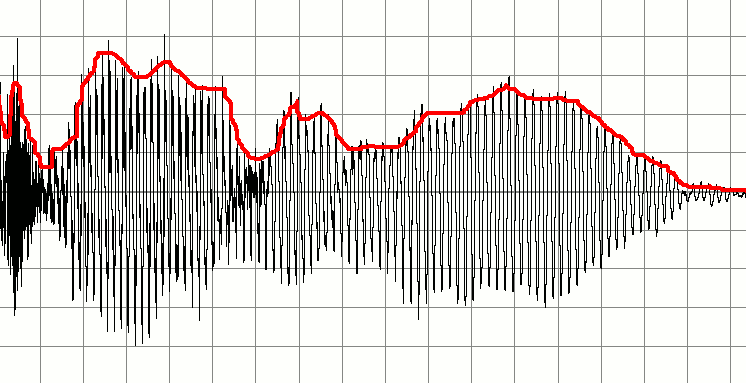

## <center>Sound Envelope (Red Line)</center>

## But how we will see if that sound level is low? 

### - For that we will form a threshold and everything below that threshold will be considered as unwanted noise.

### - A rolling window will be passed through the audio waveform and mean will be taken. 
### - If that mean is less then threshold value then remove that unwanted audio

In [ ]:
def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/20),min_periods=1,center=True).max()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask, y_mean

In [ ]:
def downsample_mono(path, sr):
    rate, wav = wavfile.read(path)
    wav = wav.astype(np.float32, order='F')
    try:
        tmp = wav.shape[1]
        wav = to_mono(wav.T)
    except:
        pass
    wav = resample(wav, rate, sr)
    wav = wav.astype(np.int16)
    return sr, wav


def check_dir(path):
    if os.path.exists(path) is False:
        os.mkdir(path)


def test_threshold(args):
    src_root = args.src_root
    wav_paths = glob('{}/**'.format(src_root), recursive=True)
    wav_path = [x for x in wav_paths if args.fn in x]
    if len(wav_path) != 1:
        print('audio file not found for sub-string: {}'.format(args.fn))
        return
    rate, wav = downsample_mono(wav_path[0], args.sr)
    mask, env = envelope(wav, rate, threshold=args.threshold)
    fig = plt.figure(figsize=(30, 30))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    
    plt.style.use('ggplot')
    plt.title('Signal Envelope, Threshold = {}'.format(str(args.threshold)))
    
    ax1.plot(wav, color='g', label='original')
    ax1.set_title('Original Audio from Tape Recorder',fontsize=30)
    ax2.plot(env, color='y', label='envelope')
    ax2.plot(wav[mask], color='c', label='keep')
    ax2.plot(wav[np.logical_not(mask)], color='r', label='remove')
    ax2.legend(loc='best',fontsize=30)
    ax2.set_title('Processed Audio',fontsize=30)
    plt.show()
    print("Original- Tape Recoder Audio")
    display(Audio(wav, rate=rate))
    print("Noise(removed)- Red")
    display(Audio(wav[np.logical_not(mask)], rate=sr))
    print("Pure Bird Call(saved)- Blue")
    display(Audio(wav[mask], rate=rate))

In [ ]:
if __name__ == '__main__':

    parser = argparse.ArgumentParser(description='Cleaning audio data')
    parser.add_argument('--src_root', type=str, default='../input/birdsong-resampled-train-audio-03',
                        help='directory of audio files in total duration')
    parser.add_argument('--dst_root', type=str, default='clean',
                        help='directory to put audio files split by delta_time')
    parser.add_argument('--delta_time', '-dt', type=float, default=1.0,
                        help='time in seconds to sample audio')
    parser.add_argument('--sr', type=int, default=16000,
                        help='rate to downsample audio')

    parser.add_argument('--fn', type=str, default='XC124970',
                        help='file to plot over time to check magnitude')
    parser.add_argument('--threshold', type=str, default=200,
                        help='threshold magnitude for np.int16 dtype')
    args, _ = parser.parse_known_args()

    test_threshold(args)


 ### ⬆️ Listen to pure Bird Call voice 
## <br><br><center>"Good Job! Grandma is proud of you."    🥰       </center>
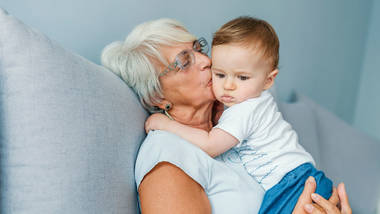

## If you find this knowledge useful please do upvote, it motivates me to work harder.

For further discussion and understanding check this https://www.kaggle.com/c/birdsong-recognition/discussion/169582



### `This EDA is being updated. Your questions and comments are very welcome!`

